In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
df1=pd.read_excel("https://query.data.world/s/eyrdmwczqapeywqo3bo2tpen6dqntz",header=1)
df1.drop(252,inplace=True)
for i in df1.columns:
    if i[:7]=="Unnamed":
        df1.rename(columns={i:j+" "+str(k)},inplace=True)
        k=k+1
    else:
        j=i
        k=1

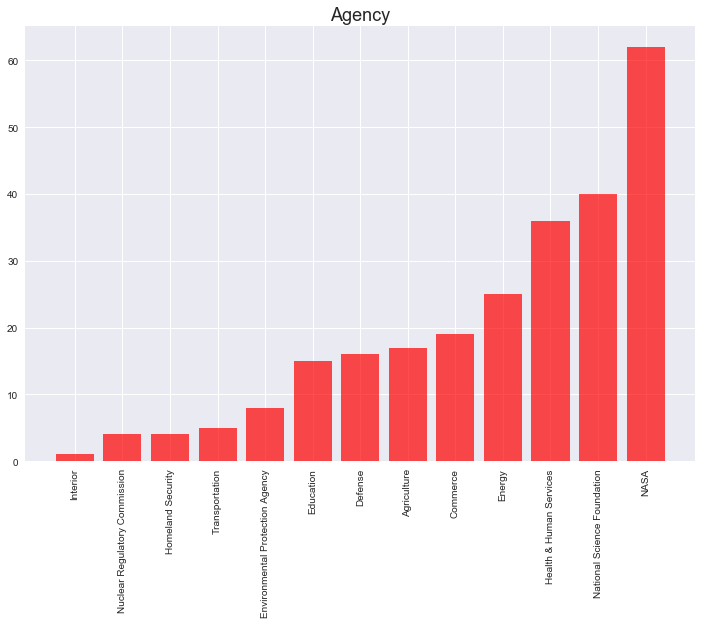

In [334]:
#AGENCY
agency_name=df1["Agency"].value_counts().sort_values().index
agency_x=df1["Agency"].value_counts().sort_values().values
plt.figure(figsize=(12,8))
plt.bar(range(0,len(agency_x)),agency_x,color="red",alpha=0.7)
plt.xticks(np.arange(0,13),agency_name,rotation=90)
plt.tick_params(bottom="off")
plt.title("Agency",fontsize=18)
plt.show()



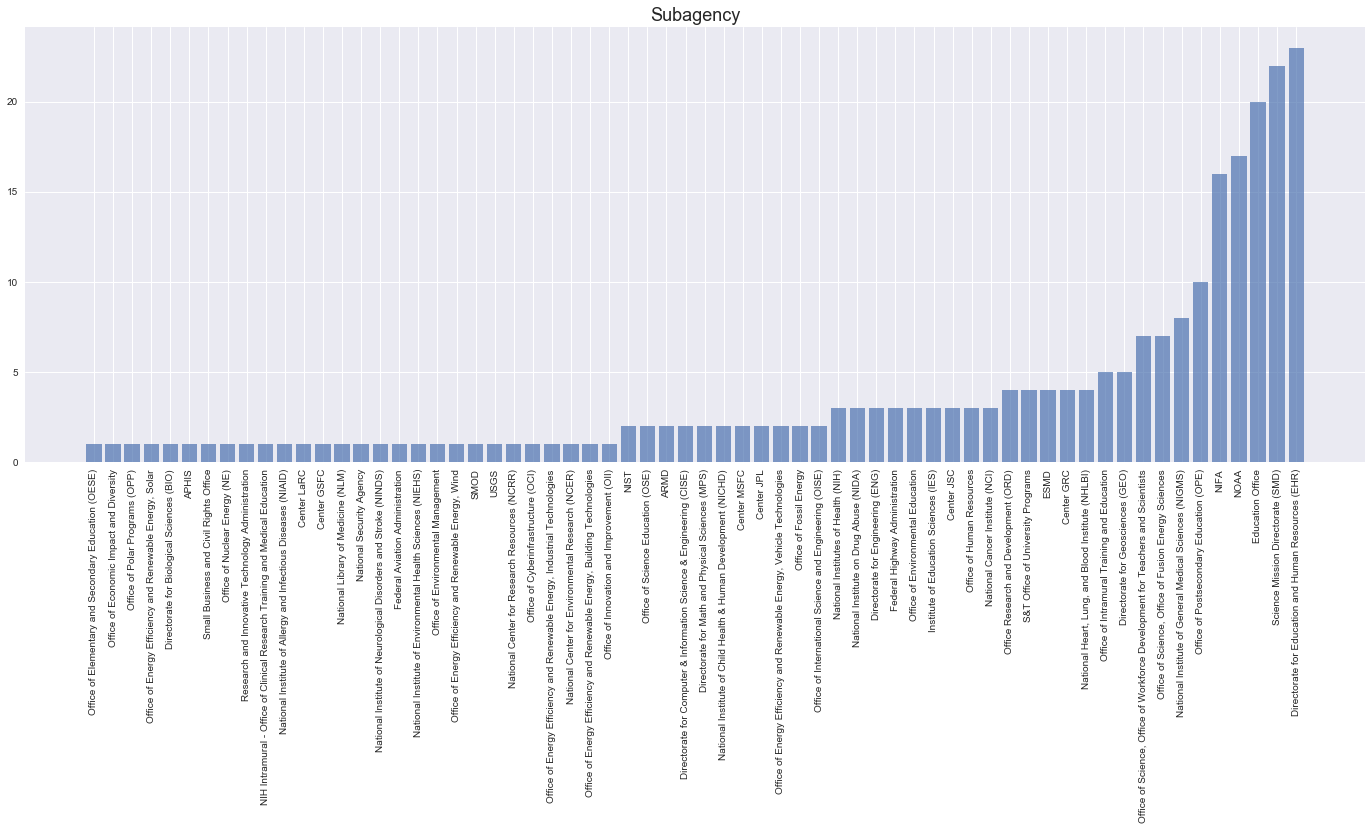

In [335]:
#Subagency
subagency_name=df1["Subagency"].value_counts().sort_values().index
subagency_x=df1["Subagency"].value_counts().sort_values().values
plt.figure(figsize=(24,8))
plt.bar(range(0,len(subagency_x)),subagency_x,alpha=0.7)
plt.xticks(np.arange(0,len(subagency_x)),subagency_name,rotation=90)
plt.tick_params(bottom="off")
plt.title("Subagency",fontsize=18)
plt.show()

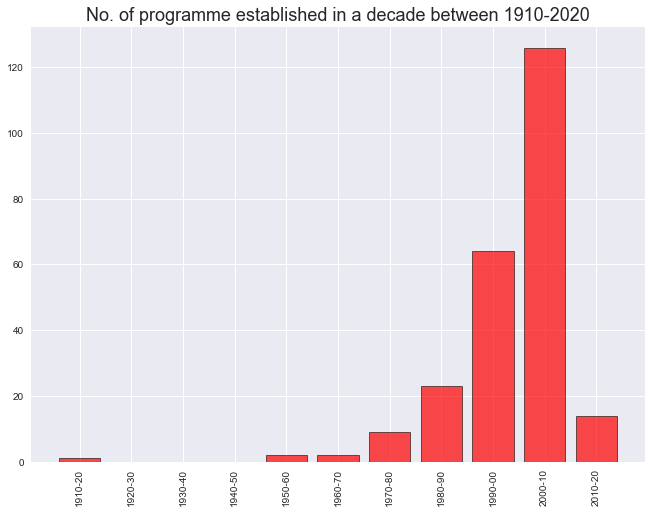

In [336]:
#year of establishment 
year=df1["B) Year Established"].value_counts().sort_values()
year=year.reset_index()
year.sort_values("index")
lt=[]
for i in year["index"].values:
    j=str(i)
    j=j[:3]+"0"+"-"+str(int(j[:3])+1)[2:]+"0"
    lt.append(j)
year["new"]=lt
ob=year.groupby("new")
year=ob.sum().drop("index",axis=1)
year.loc["1920-30"]=0
year.loc["1930-40"]=0
year.loc["1940-50"]=0
plt.figure(figsize=(11,8))
plt.bar(range(0,len(year)),year.reset_index().sort_values("new")["B) Year Established"],linewidth=0.8,edgecolor="black",alpha=0.7,color="red")
plt.xticks(np.arange(0,len(year)),year.reset_index().sort_values("new")["new"],rotation=90)
plt.tick_params(bottom="off")
plt.title("No. of programme established in a decade between 1910-2020",fontsize=18)
plt.show()



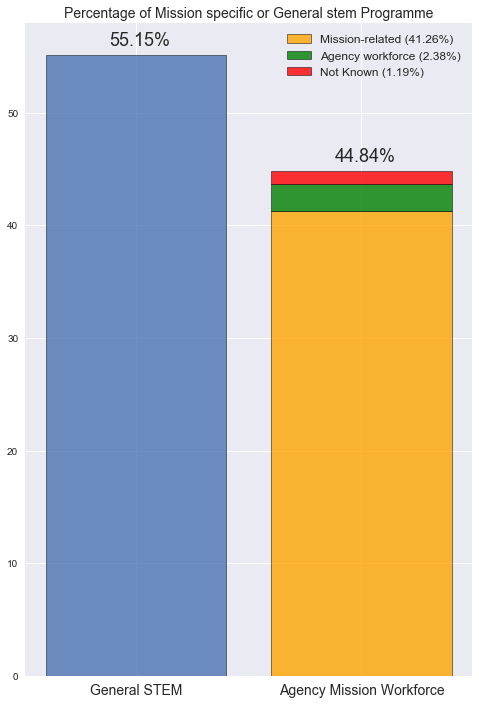

In [337]:
#D) Mission-specific or General STEM? and E) Agency or Mission-Related Workforce Needs?

plt.figure(figsize=(8,12))
plt.bar(range(0,1),df1["D) Mission-specific or General STEM?"].value_counts().values[0]*100/df1["D) Mission-specific or General STEM?"].value_counts().sum(),alpha=0.8,edgecolor="black",linewidth=0.6)
plt.bar(range(1,2),df1["E) Agency or Mission-Related Workforce Needs?"].value_counts().values[0]*100/df1["D) Mission-specific or General STEM?"].value_counts().sum(),label="Mission-related ("+str(104*100/252)[:5]+"%)",alpha=0.8,edgecolor="black",linewidth=0.6,color="orange")
plt.bar(range(1,2),df1["E) Agency or Mission-Related Workforce Needs?"].value_counts().values[1]*100/df1["D) Mission-specific or General STEM?"].value_counts().sum(),bottom=df1["E) Agency or Mission-Related Workforce Needs?"].value_counts().values[0]*100/df1["D) Mission-specific or General STEM?"].value_counts().sum(),label="Agency workforce ("+str(6*100/252)[:4]+"%)",alpha=0.8,edgecolor="black",linewidth=0.6,color="green")
plt.bar(range(1,2),3*100/252,bottom=110*100/252,color="red",label="Not Known ("+str(3*100/252)[:4]+"%)",alpha=0.8,edgecolor="black",linewidth=0.6)
plt.xticks(np.arange(0,2),df1["D) Mission-specific or General STEM?"].value_counts().index,fontsize=14)
plt.title("Percentage of Mission specific or General stem Programme",fontsize=14)
for i,j in zip(range(0,2),df1["D) Mission-specific or General STEM?"].value_counts().values*100/df1["D) Mission-specific or General STEM?"].value_counts().sum()):
    plt.text(i-.12,j+.8,str(j)[:5]+"%",fontsize=18)
plt.gca().tick_params(bottom="off")
plt.gca().legend(fontsize=12,frameon=False)
plt.show()

C:\Users\Insprion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Insprion\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


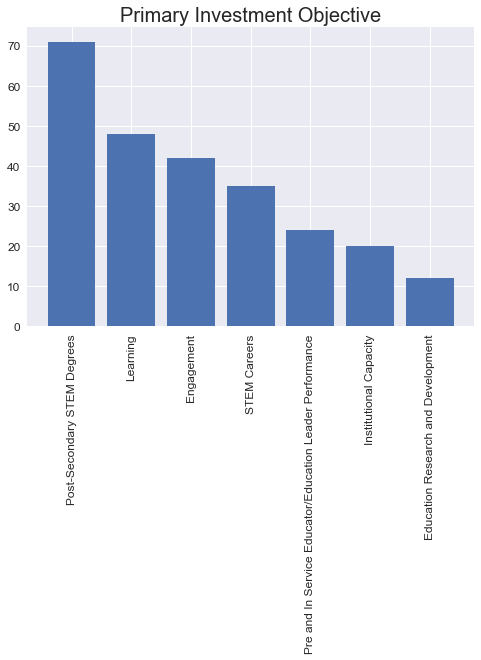

In [338]:
#F1) Primary Investment Objective
i=df1["F1) Primary Investment Objective"]
k=0
for j in i.values:
    j=str(j)
    if j.find(":")!=-1:
        i[k]=j[:j.find(":")]
    else:
        i[k]=j
    k=k+1
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Primary Investment Objective",fontsize=20)
plt.show()

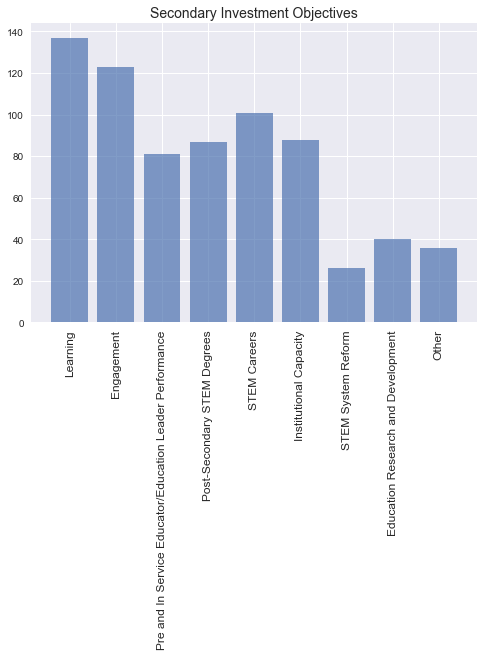

In [339]:
#df1.columns.get_loc("F2) Secondary Investment Objectives")
df2=df1.iloc[:,12:21]
i=df2.dropna(thresh=8).iloc[0]
k=0
for j in i.values:
    j=str(j)
    if j.find(":")!=-1:
        i[k]=j[:j.find(":")]
    else:
        i[k]=j
    k=k+1
df2.rename(columns=dict(i),inplace=True)
df2.rename(columns={"nan":"Post-Secondary STEM Degrees"},inplace=True)
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,9),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,9),df2.sum().index,fontsize=12,rotation=90)
plt.title("Secondary Investment Objectives",fontsize=14)
plt.show()

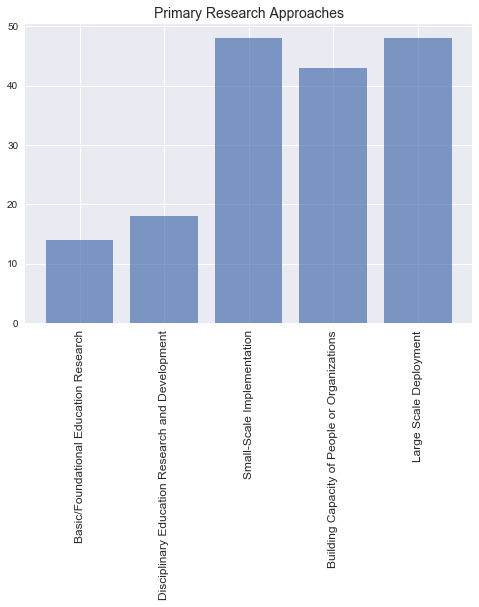

In [340]:
#G1) Primary Research Approaches
df2=df1.iloc[:,df1.columns.get_loc("G1) Primary Research Approaches"):df1.columns.get_loc("G2) Secondary Research Approaches")]
i=df2.dropna(thresh=4).iloc[0]
k=0
for j in i.values:
    j=str(j)
    if j.find(":")!=-1:
        i[k]=j[:j.find(":")]
    else:
        i[k]=j
    k=k+1
df2.rename(columns=dict(i),inplace=True)
df2.rename(columns={"nan":"Small-Scale Implementation"},inplace=True)
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,5),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,5),df2.sum().index,fontsize=12,rotation=90)
plt.title("Primary Research Approaches",fontsize=14)
plt.show()

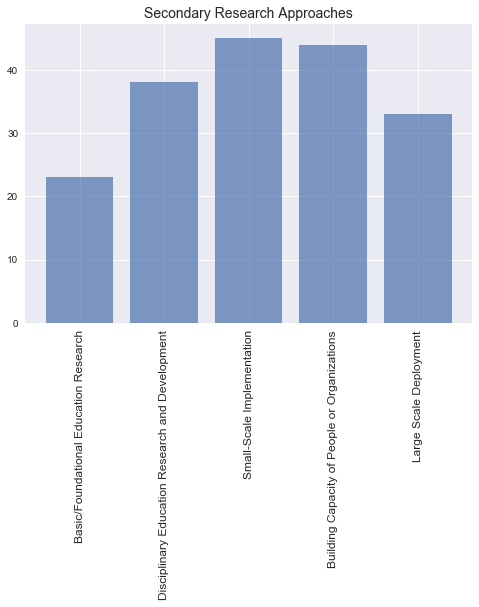

In [341]:
#G2) Secondary Research Approaches
df2=df1.iloc[:,df1.columns.get_loc("G2) Secondary Research Approaches"):df1.columns.get_loc("G3) Research Approaches Not Used")]
i=df2.dropna(thresh=4).iloc[0]
k=0
for j in i.values:
    j=str(j)
    if j.find(":")!=-1:
        i[k]=j[:j.find(":")]
    else:
        i[k]=j
    k=k+1
df2.rename(columns=dict(i),inplace=True)
df2.rename(columns={"nan":"Basic/Foundational Education Research"},inplace=True)
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,5),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,5),df2.sum().index,fontsize=12,rotation=90)
plt.title("Secondary Research Approaches",fontsize=14)
plt.show()

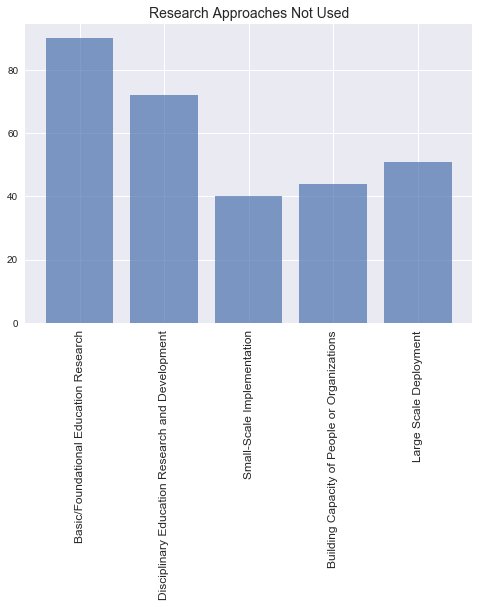

In [342]:
#G3) Research Approaches Not Used
df2=df1.iloc[:,df1.columns.get_loc("G3) Research Approaches Not Used"):df1.columns.get_loc("H) Educational Services or Products Produced")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    lt.append(j[j.find("'")+1:])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,5),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,5),lt,fontsize=12,rotation=90)
plt.title("Research Approaches Not Used",fontsize=14)
plt.show()



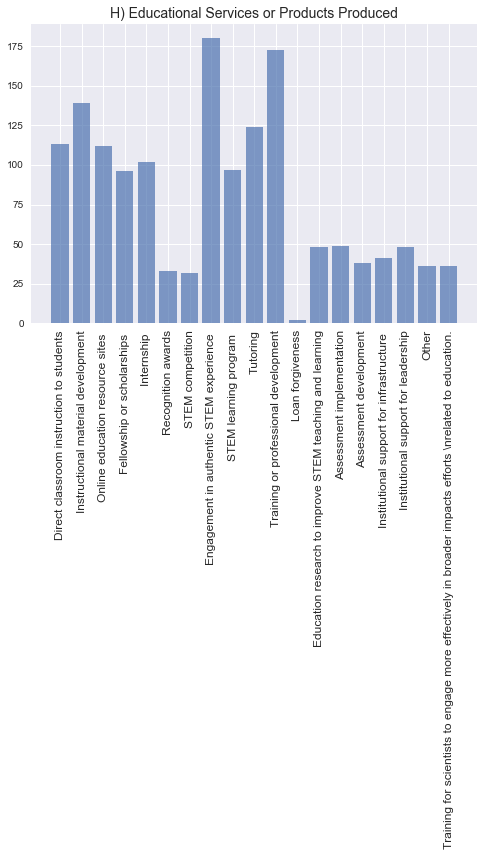

In [343]:
#H) Educational Services or Products Produced
df2=df1.iloc[:,df1.columns.get_loc("H) Educational Services or Products Produced"):df1.columns.get_loc("I1) STEM Learners Targeted? Specify.")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)         
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("H) Educational Services or Products Produced",fontsize=14)
plt.show()

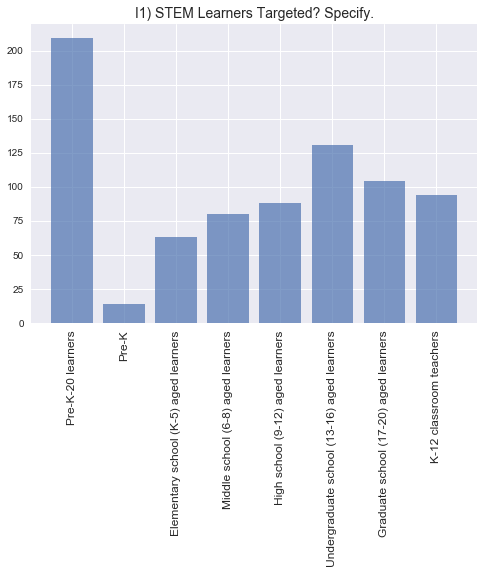

In [344]:
#I1) STEM Learners Targeted? Specify.
df2=df1.iloc[:,df1.columns.get_loc("I1) STEM Learners Targeted? Specify."):df1.columns.get_loc("I2) Pre-service-service STEM Teachers Targeted? Specify.")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12,rotation=90)
plt.title("I1) STEM Learners Targeted? Specify.",fontsize=14)
plt.show()

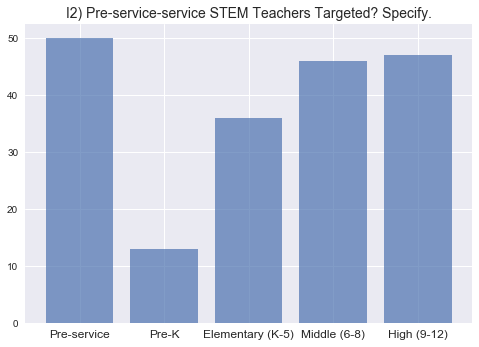

In [345]:
#I2) Pre-service-service STEM Teachers Targeted? Specify.
df2=df1.iloc[:,df1.columns.get_loc("I2) Pre-service-service STEM Teachers Targeted? Specify."):df1.columns.get_loc("I3) In-service STEM Teachers Targeted? Specify.")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12)
plt.title("I2) Pre-service-service STEM Teachers Targeted? Specify.",fontsize=14)
plt.show()

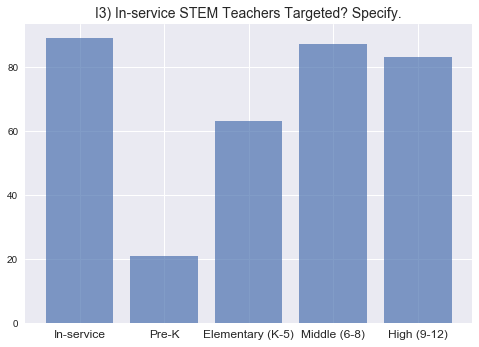

In [346]:
#I3) In-service STEM Teachers Targeted? Specify.
df2=df1.iloc[:,df1.columns.get_loc("I3) In-service STEM Teachers Targeted? Specify."):df1.columns.get_loc("I4) Adult Learners Targeted?")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12)
plt.title("I3) In-service STEM Teachers Targeted? Specify.",fontsize=14)
plt.show()

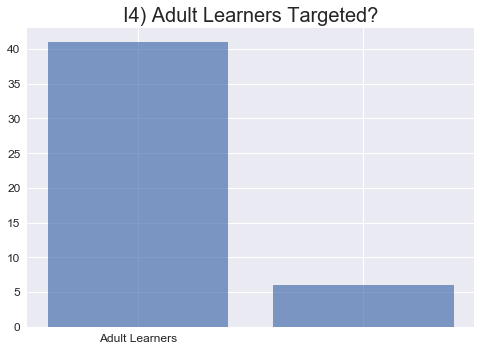

In [347]:
#S) I4) Adult Learners Targeted?
i=df1["I4) Adult Learners Targeted?"]
i.dropna(inplace=True)
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values,alpha=0.7)
plt.xticks(np.arange(0,len(i.value_counts())),["Adult Learners"],fontsize=12)
plt.yticks(fontsize=12)
plt.title("I4) Adult Learners Targeted?",fontsize=20)
plt.show()


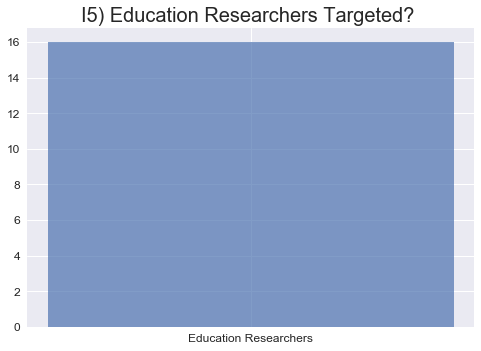

In [348]:
#I5) Education Researchers Targeted? 

i=df1["I5) Education Researchers Targeted? "]
i.dropna(inplace=True)
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values,alpha=0.7)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,fontsize=12)
plt.yticks(fontsize=12)
plt.title("I5) Education Researchers Targeted? ",fontsize=20)
plt.show()

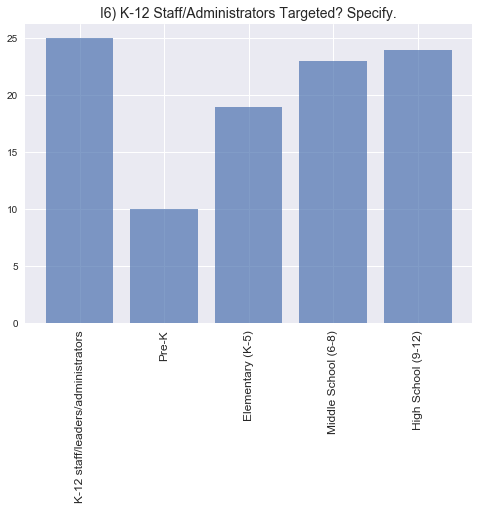

In [349]:
#I6) K-12 Staff/Administrators Targeted? Specify.
df2=df1.iloc[:,df1.columns.get_loc("I6) K-12 Staff/Administrators Targeted? Specify."):df1.columns.get_loc("I7) Post-secondary Instructors Targeted? Specify.")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12,rotation=90)
plt.title("I6) K-12 Staff/Administrators Targeted? Specify.",fontsize=14)
plt.show()

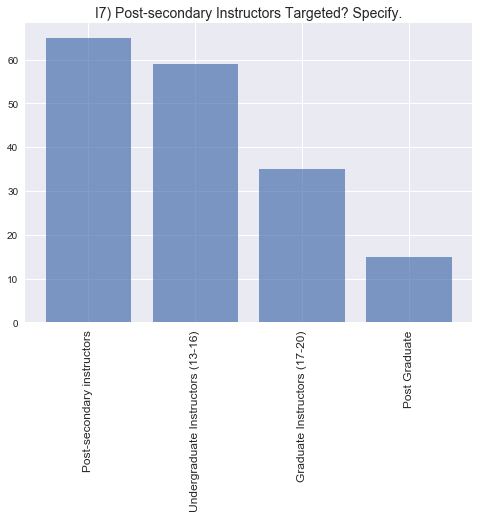

In [350]:
#I7) Post-secondary Instructors Targeted? Specify.
df2=df1.iloc[:,df1.columns.get_loc("I7) Post-secondary Instructors Targeted? Specify."):df1.columns.get_loc("I8) Post-secondary Staff Targeted? Specify.")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12,rotation=90)
plt.title("I7) Post-secondary Instructors Targeted? Specify.",fontsize=14)
plt.show()

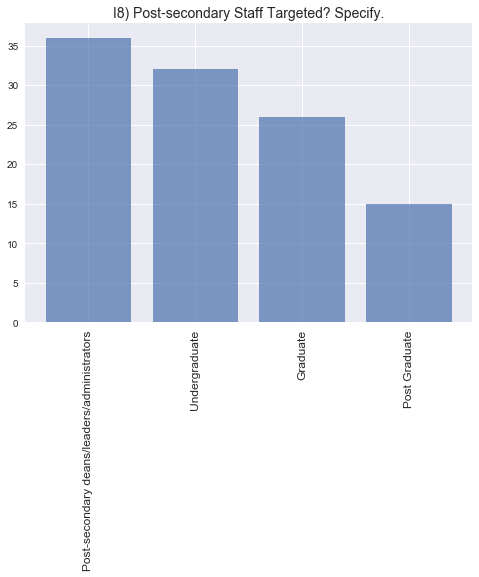

In [351]:
#I8) Post-secondary Staff Targeted? Specify.
df2=df1.iloc[:,df1.columns.get_loc("I8) Post-secondary Staff Targeted? Specify."):df1.columns.get_loc("I9) Informal Stem Educators Targeted?")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12,rotation=90)
plt.title("I8) Post-secondary Staff Targeted? Specify.",fontsize=14)
plt.show()

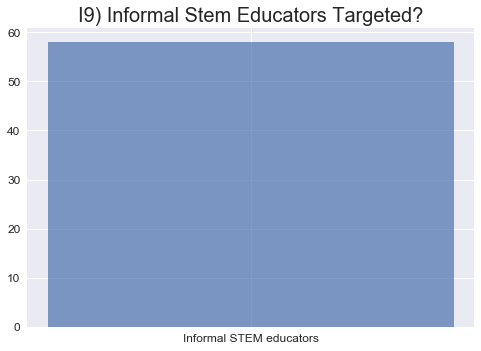

In [352]:
#I9) Informal Stem Educators Targeted?
i=df1["I9) Informal Stem Educators Targeted?"]
i.dropna(inplace=True)
i.replace(i.unique(),[i.unique()[0],i.unique()[0]],inplace=True)
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values,alpha=0.7)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,fontsize=12)
plt.yticks(fontsize=12)
plt.title("I9) Informal Stem Educators Targeted?",fontsize=20)
plt.show()


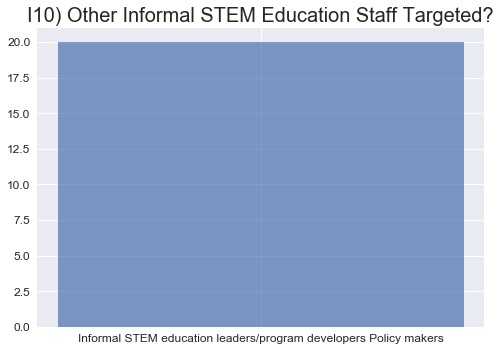

In [353]:
#I10) Other Informal STEM Education Staff Targeted?
i=df1["I10) Other Informal STEM Education Staff Targeted?"]
i.dropna(inplace=True)
i.replace(i.unique(),[i.unique()[0],i.unique()[0]],inplace=True)
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values,alpha=0.7)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,fontsize=12)
plt.yticks(fontsize=12)
plt.title("I10) Other Informal STEM Education Staff Targeted?",fontsize=20)
plt.show()


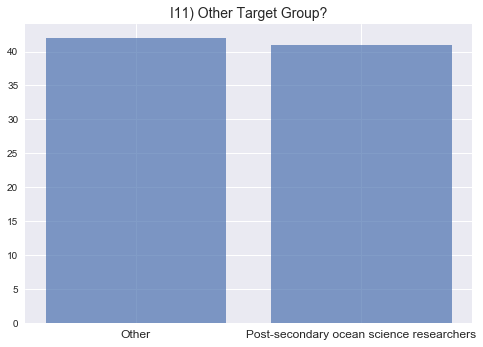

In [354]:
#I11) Other Target Group?
df2=df1.iloc[:,df1.columns.get_loc("I11) Other Target Group?"):df1.columns.get_loc("J) Focus on Underrepresented Groups in STEM")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),[lt[0],lt[1][:lt[1].find(".")]],fontsize=12,)
plt.title("I11) Other Target Group?",fontsize=14)
plt.show()

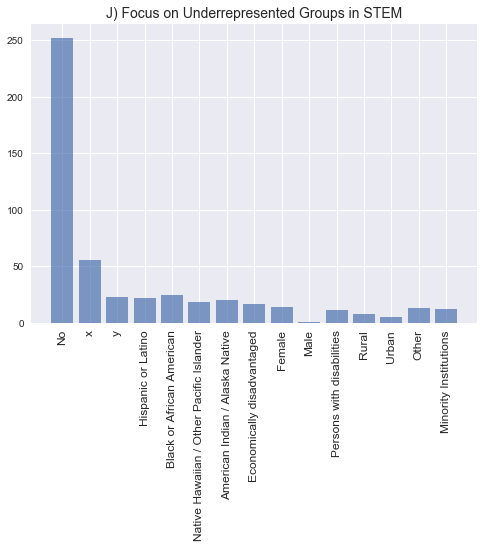

In [355]:
#J) Focus on Underrepresented Groups in STEM
df2=df1.iloc[:,df1.columns.get_loc("J) Focus on Underrepresented Groups in STEM"):df1.columns.get_loc("K) Eligibility Restrictions")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),lt,fontsize=12,rotation=90)
plt.title("J) Focus on Underrepresented Groups in STEM",fontsize=14)
plt.show()

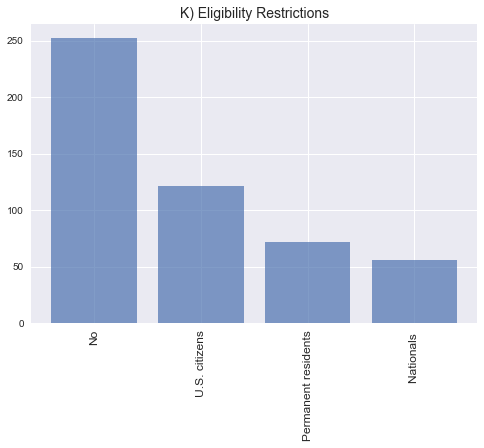

In [356]:
#K) Eligibility Restrictions
df2=df1.iloc[:,df1.columns.get_loc("K) Eligibility Restrictions"):df1.columns.get_loc("L) Minority Serving Institutions")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
a=lt[:-1]
a.append(lt[-1][:lt[-1].find("(")])
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("K) Eligibility Restrictions",fontsize=14)
plt.show()


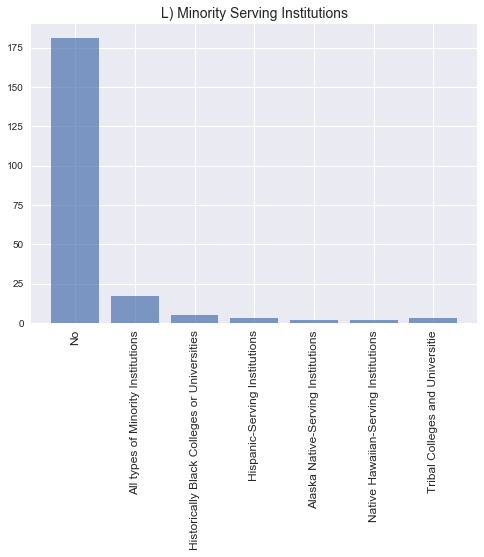

In [357]:
#L) Minority Serving Institutions
df2=df1.iloc[:,df1.columns.get_loc("L) Minority Serving Institutions"):df1.columns.get_loc("M) Geographic Region")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
a=lt[:-1]
a.append(lt[-1][:lt[-1].find("(")])
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("L) Minority Serving Institutions",fontsize=14)
plt.show()


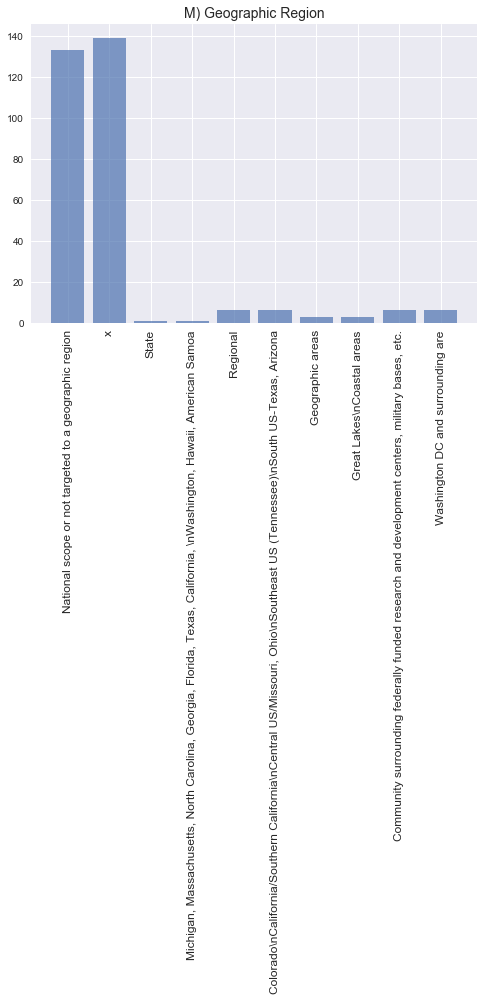

In [358]:
#M) Geographic Region
df2=df1.iloc[:,df1.columns.get_loc("M) Geographic Region"):df1.columns.get_loc("N) STEM Discipline Focus")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
a=lt[:-1]
a.append(lt[-1][:lt[-1].find("(")])
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("M) Geographic Region",fontsize=14)
plt.show()


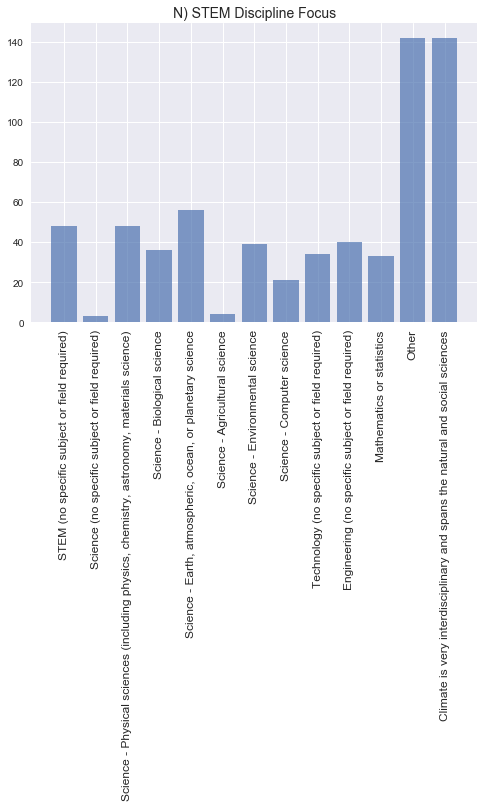

In [359]:
#N) STEM Discipline Focus
df2=df1.iloc[:,df1.columns.get_loc("N) STEM Discipline Focus"):df1.columns.get_loc("O) Organization or Individual Funded")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
df2.fillna(0,inplace=True)
df2[df2!=0]=1
a=lt[:-1]
a.append(lt[-1][:lt[-1].find("(")])
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("N) STEM Discipline Focus",fontsize=14)
plt.show()


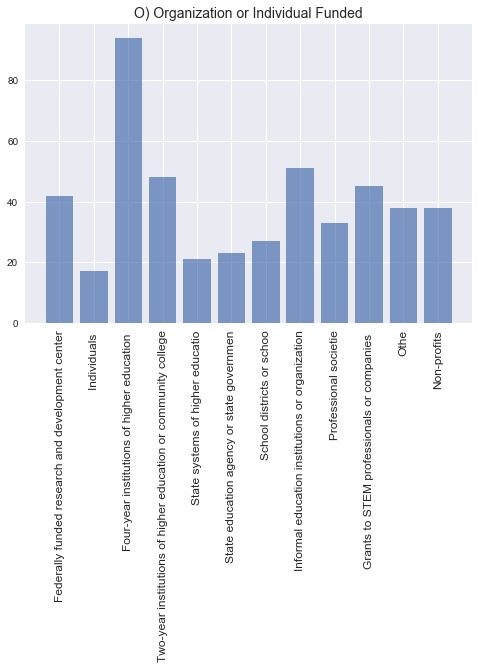

In [360]:
#O) Organization or Individual Funded
df2=df1.iloc[:,df1.columns.get_loc("O) Organization or Individual Funded"):df1.columns.get_loc("P) External Funding Allocation")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j[:j.find("(")])
    else:
        a.append(j[:j.find("(")]) 
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("O) Organization or Individual Funded",fontsize=14)
plt.show()


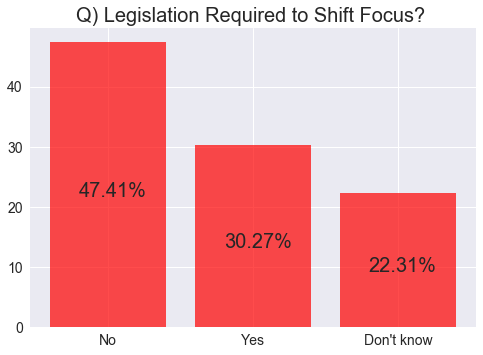

In [361]:
# Legislation Required to Shift Focus? 
i=df1["Q) Legislation Required to Shift Focus?"]
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values*100/i.value_counts().sum(),color="red",alpha=0.7)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Q) Legislation Required to Shift Focus? ",fontsize=20)
for j,k in zip(range(0,len(i.value_counts())),i.value_counts().values*100/i.value_counts().sum()):
    plt.text(j-0.2,k/2-2,str(k)[:5]+"%",fontsize=20)
plt.show()

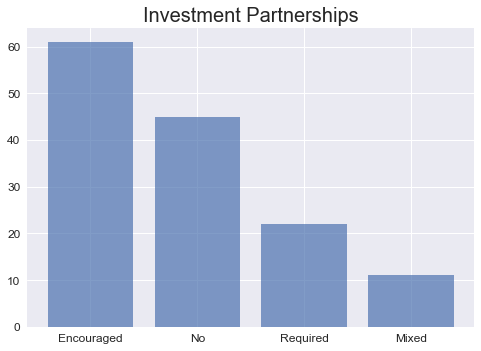

In [362]:
#S) Investment Partnerships
i=df1["S) Investment Partnerships"]
i.dropna(inplace=True)
plt.figure()
plt.bar(range(0,len(i.value_counts())),i.value_counts().values,alpha=0.7)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Investment Partnerships",fontsize=20)
plt.show()

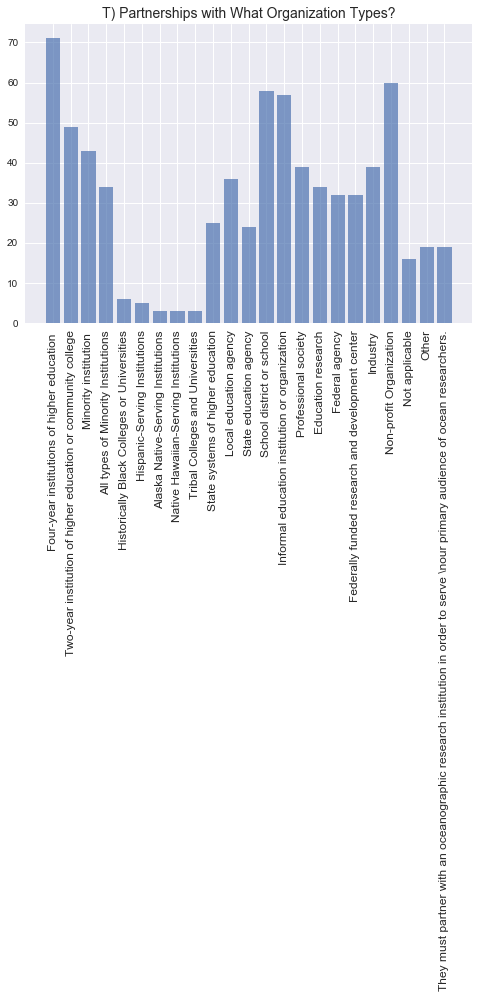

In [363]:
#T) Partnerships with What Organization Types?
df2=df1.iloc[:,df1.columns.get_loc("T) Partnerships with What Organization Types?"):df1.columns.get_loc("U) Measured Outputs")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("T) Partnerships with What Organization Types?",fontsize=14)
plt.show()


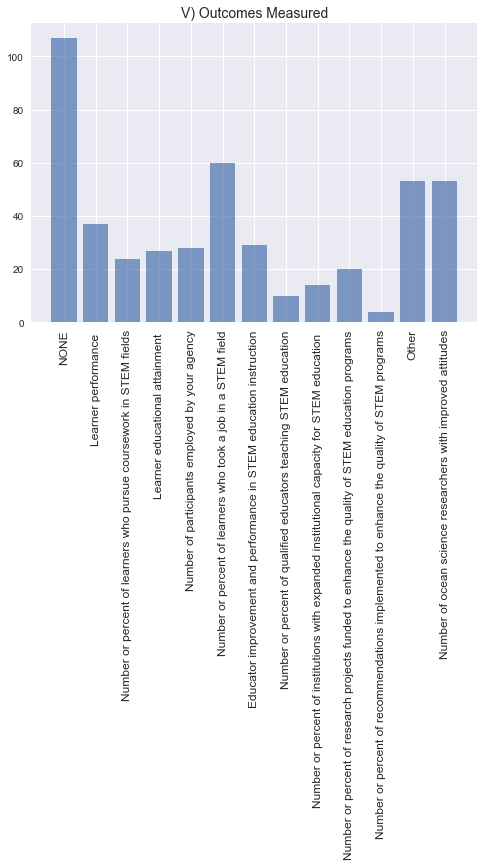

In [364]:
#V) Outcomes Measured
df2=df1.iloc[:,df1.columns.get_loc("V) Outcomes Measured"):df1.columns.get_loc("W) Measurement Instruments Used")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("V) Outcomes Measured",fontsize=14)
plt.show()


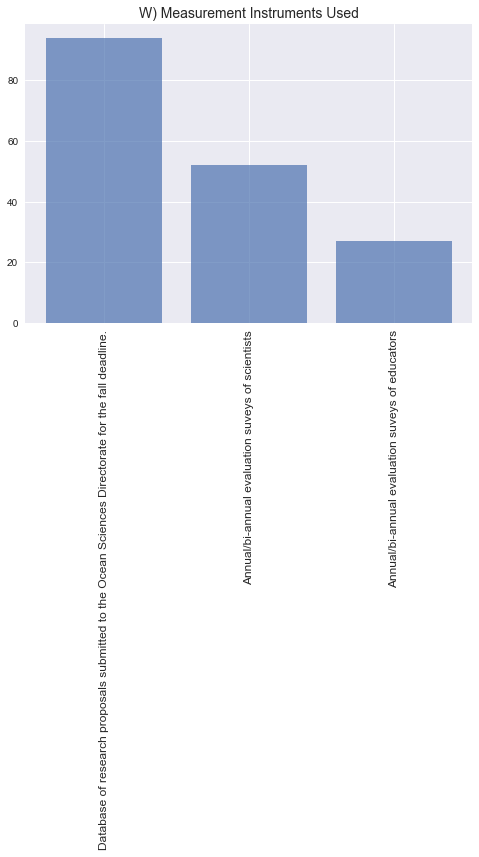

In [365]:
#W) Measurement Instruments Used
df2=df1.iloc[:,df1.columns.get_loc("W) Measurement Instruments Used"):df1.columns.get_loc("X) Evaluated Since 2005?")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12,rotation=90)
plt.title("W) Measurement Instruments Used",fontsize=14)
plt.show()


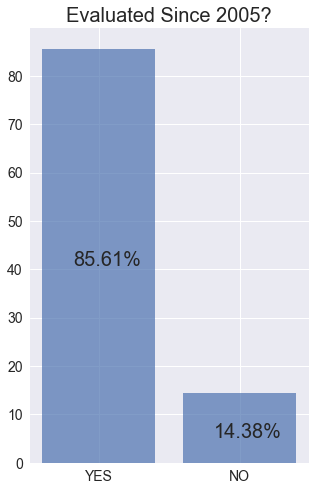

In [366]:
#X) Evaluated Since 2005?
i=df1["X) Evaluated Since 2005?"]
i.dropna(inplace=True)
plt.figure(figsize=(5,8))
plt.bar(range(0,len(i.value_counts())),i.value_counts().values*100/i.value_counts().sum(),alpha=0.7,)
plt.xticks(np.arange(0,len(i.value_counts())),i.value_counts().index,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Evaluated Since 2005?",fontsize=20)
for j,k in zip(range(0,len(i.value_counts())),i.value_counts().values*100/i.value_counts().sum()):
    plt.text(j-0.18,k/2-2,str(k)[:5]+"%",fontsize=20)
plt.show()


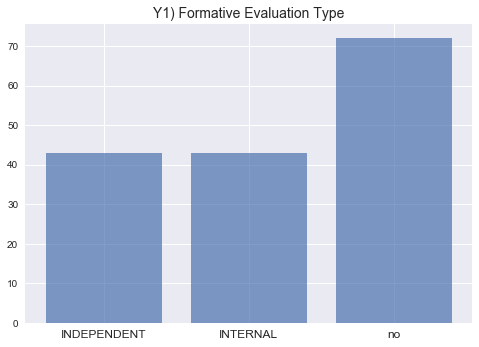

In [367]:
#Y1) Formative Evaluation Type
df2=df1.iloc[:,df1.columns.get_loc("Y1) Formative Evaluation Type"):df1.columns.get_loc("Y2) Summative Evaluation Type")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12)
plt.title("Y1) Formative Evaluation Type",fontsize=14)
plt.show()


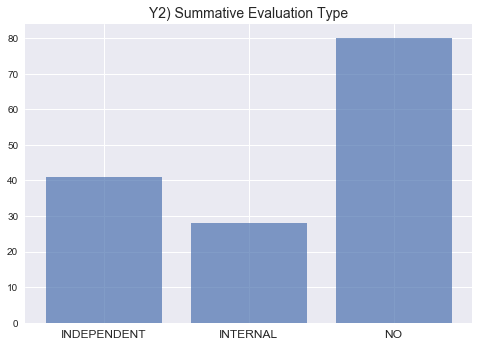

In [368]:
#Y2) Summative Evaluation Type
df2=df1.iloc[:,df1.columns.get_loc("Y2) Summative Evaluation Type"):df1.columns.get_loc("Y3) Process or Implementation Evaluation Type")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12)
plt.title("Y2) Summative Evaluation Type",fontsize=14)
plt.show()


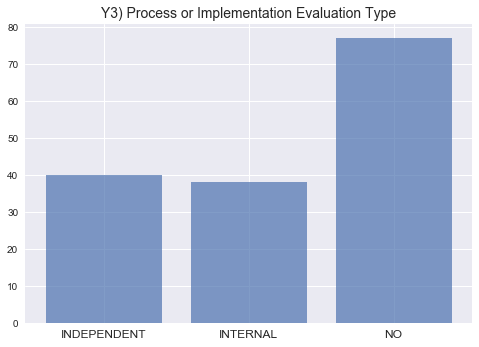

In [369]:
#Y3) Process or Implementation Evaluation Type
df2=df1.iloc[:,df1.columns.get_loc("Y3) Process or Implementation Evaluation Type"):df1.columns.get_loc("Y4) Portfolio Evaluation/Review Type")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12)
plt.title("Y3) Process or Implementation Evaluation Type",fontsize=14)
plt.show()


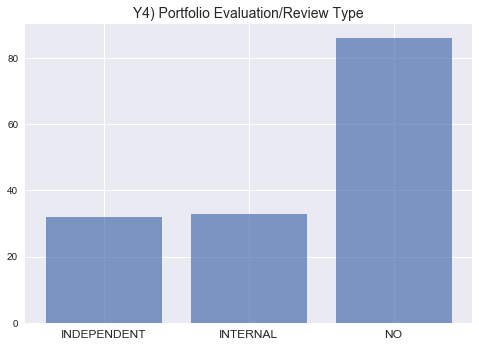

In [370]:
#Y4) Portfolio Evaluation/Review Type
df2=df1.iloc[:,df1.columns.get_loc("Y4) Portfolio Evaluation/Review Type"):df1.columns.get_loc("Y5) Expert Review Type")]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12)
plt.title("Y4) Portfolio Evaluation/Review Type",fontsize=14)
plt.show()


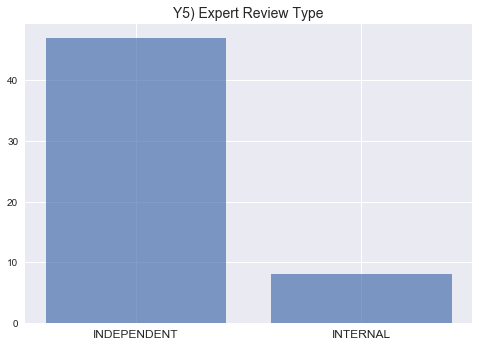

In [371]:
#Y5) Expert Review Type
df2=df1.iloc[:,df1.columns.get_loc("Y5) Expert Review Type"):]
lt=[]
for i in df2.columns:
    j=str(df2[i].unique())
    j=j[j.find("'")+1:]
    lt.append(j[:j.find("'")])
k=0
for j in lt:
    j=str(j)
    if j.find(":")!=-1:
        lt[k]=j[:j.find(":")]
    else:
        lt[k]=j
    k=k+1
a=[]    
for j in lt:
    if j.find(",")!=-1:
        j=j[:j.find(",")]
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)
    else:
        if j.find("(")!=-1:
            a.append(j[:j.find("(")])
        else:
            a.append(j)     
    
df2.fillna(0,inplace=True)
df2[df2!=0]=1
plt.figure()
plt.bar(range(0,len(df2.sum().values)),df2.sum().values,alpha=0.7)
plt.xticks(np.arange(0,len(df2.sum().values)),a,fontsize=12)
plt.title("Y5) Expert Review Type",fontsize=14)
plt.show()
